# COVID-19 Pneumonia Classification
I got this Dataset of Covid-19 from Kaggle (https://www.kaggle.com/datasets/meirnizri/covid19-dataset)

I am learning to create a machine learning model, and in this case it is the classification of people affected by Covid-19 with symptoms of pneumonia

Overall Steps:

* Import all Libraries & Load the Dataset
* Split Data (Train and test)
* Exploratory Data Analysis (EDA) categorical data and numerical data
* Removing redundant variable based on business value
* Data Preparation: Data Train
  * Drop duplicated data
  * Outliers analysis
  * Removing outliers
  * Missing value handling
* Data Preparation: Data Test
  * Drop duplicated data
  * Removing outliers
  * Missing value handling
* Split data into Xtrain, ytrain, Xtest, ytest
* Encoding preparation
* Encode separately for data train and data test
* Split variable train and variable test into different categories
* Standar Scaller
* Modelling Classification ML algorithms:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Naive Bayes
  * Support Vector Machine (SVM)

* Evaluation Model
  * Confusion Matrix Evaluation
  * Learning curve Regression
  * Learning curve K-Nearest Neighbor (KNN)
  * Learning curve Naive Bayes
  * Learning curve Support Vector Machine (SVM)


# Import all libraries

In [144]:
# import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np

# import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scipy statistical, standarscaller
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
from sklearn import preprocessing
import warnings
import random

# import ML Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# import for split
from sklearn.model_selection import train_test_split

# evaluation library
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# other
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import learning_curve
import pkg_resources

# Attribute Information

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. *In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.*

**Desciption of columns**

1. **sex**: 1 for female and 2 for male.
2. **age**: of the patient.
3. **classification**: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
4. **patient type**: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
5. **pneumonia**: whether the patient already have air sacs inflammation or not.
6. **pregnancy**: whether the patient is pregnant or not.
7. **diabetes**: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
8. **asthma**: whether the patient has asthma or not.
9. **inmsupr**: whether the patient is immunosuppressed or not.
10. **hypertension**: whether the patient has hypertension or not.
11. **cardiovascular**: whether the patient has heart or blood vessels related disease.
12. **renal chronic**: whether the patient has chronic renal disease or not.
13. **other disease**: whether the patient has other disease or not.
14. **obesity**: whether the patient is obese or not.
15. **tobacco**: whether the patient is a tobacco user.
16. **usmr**: Indicates whether the patient treated medical units of the first, second or third level.
17. **medical unit**: type of institution of the National Health System that provided the care.
18. **intubed**: whether the patient was connected to the ventilator.
19. **icu**: Indicates whether the patient had been admitted to an Intensive Care Unit.
20. **date died**: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# A. Data Understanding

In [2]:
# read data
df_covid = pd.read_csv('/content/sample_data/Covid_data.csv')
# show all table columns
pd.set_option('display.max_columns', None)
df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [4]:
df_covid.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
593198,2,12,2,1,9999-99-99,97,2,51,97,2,2,2,2,2,2,2,2,2,2,3,97
301269,2,4,1,1,9999-99-99,97,2,58,2,2,2,2,2,2,2,2,1,2,2,7,97
480231,1,12,2,2,9999-99-99,2,1,27,97,2,2,2,2,2,2,2,2,2,2,3,2
722707,1,12,2,2,9999-99-99,2,1,1,97,2,2,2,2,2,2,2,2,2,2,7,2
314937,2,4,2,1,9999-99-99,97,2,37,97,2,2,2,2,2,2,2,2,2,2,7,97
768630,2,12,2,1,9999-99-99,97,2,45,97,2,2,2,2,1,2,2,1,2,2,7,97
100771,2,4,2,2,9999-99-99,2,1,78,97,2,2,2,2,2,2,2,2,2,2,3,2
459288,2,12,2,2,19/06/2020,2,1,64,97,2,2,2,2,2,2,2,2,2,2,3,2
1038925,2,12,2,1,9999-99-99,97,2,17,97,2,2,2,2,2,2,2,2,2,2,7,97
349690,2,6,2,2,9999-99-99,1,1,58,97,1,2,2,2,2,2,2,1,2,2,3,2


In [5]:
# show value counts of pneumonia
df_covid["PNEUMONIA"].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [6]:
print(f'{892534/(892534+140038)} = almost balanced') # standart 45% - 55%

0.864379433104907 = almost balanced


### Split Data (Train & Test)

In [7]:
df_covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [8]:
# Drop DATE_DIED column because no needed
df_covid = df_covid.drop("DATE_DIED", axis=1)

In [9]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

In [10]:
df_covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [11]:
train, test = train_test_split(df_covid, train_size=0.8, random_state=42, stratify= df_covid.PNEUMONIA) # use stratify if want to keep the ratio

In [12]:
train["PNEUMONIA"].value_counts()

2     714027
1     112030
99     12803
Name: PNEUMONIA, dtype: int64

In [13]:
print(f'{714027/(714027+112030)} = almost balanced') # standart 45% - 55%

0.8643798188260616 = almost balanced


## Exploratory Data Analysis (EDA)

### Identify numerical and categorical data

In [14]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   INTUBED               1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

In [15]:
df_covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

*All data types are numerical, no tupe categorical found*

### Heatmap Correlation

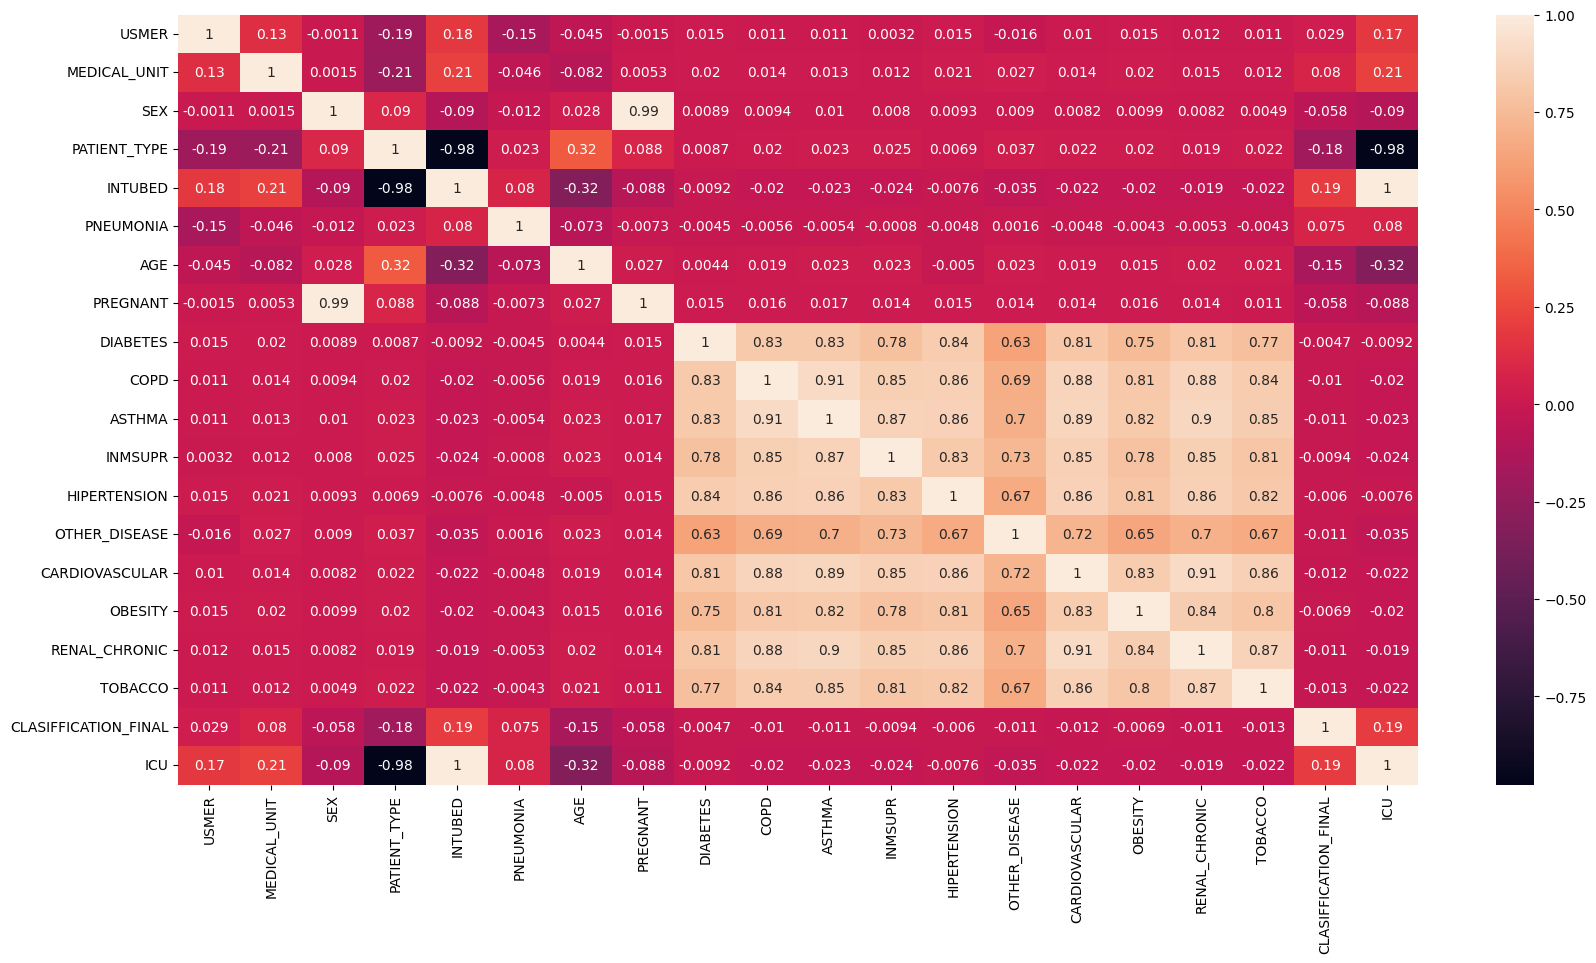

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df_covid.corr(), annot = True)
plt.show()

*Check first before selecting variables into the regression model because this is one step to avoid overfitting.*

### Categorical

In [ ]:
def categorical_data(title):
    plt.figure(figsize=(17,8))

    # calculate proportion values for each category
    prop_df = df_covid.groupby([title, 'Variable_Target']).size().reset_index(name='count') # change variable_target to real target
    prop_df['prop'] = prop_df.groupby(title)['count'].apply(lambda x: x / x.sum())

    g=sns.catplot(x=title, y='prop', kind='bar', hue='Variable_Target', palette='viridis', data=prop_df, height=8.27, aspect=11.7/8.27)
    #displays the value of each barplot
    ax = g.facet_axis(0,0)
    for p in ax.patches:
       ax.text(p.get_x() + p.get_width() / 2.,
            p.get_height(),
            '{0:.2f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large', ha='center')
    plt.show()

*There are no categorical data*

### Numerical

In [17]:
df_covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [18]:
# Function to show plot numerical data
def dist_bivariate(data, cols):
    for col in cols:
        sns.FacetGrid(data, hue='PNEUMONIA', palette='cubehelix').map(sns.histplot, col).add_legend()
        plt.show()

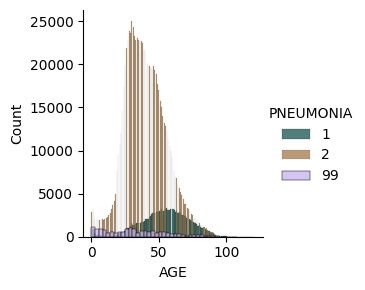

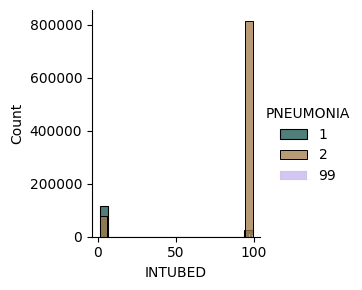

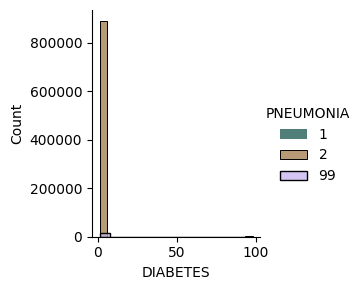

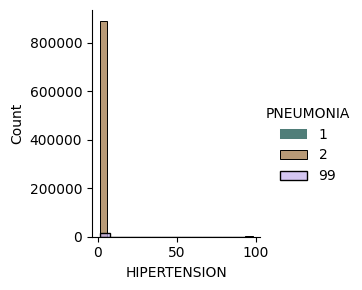

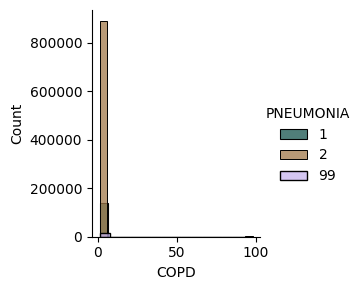

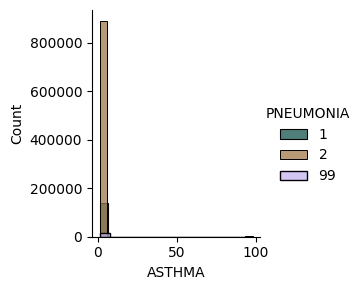

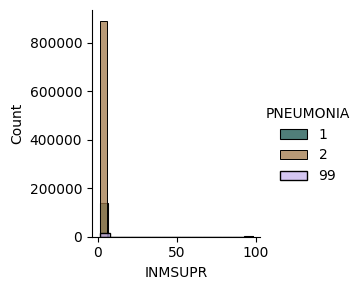

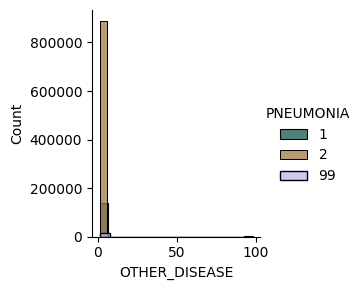

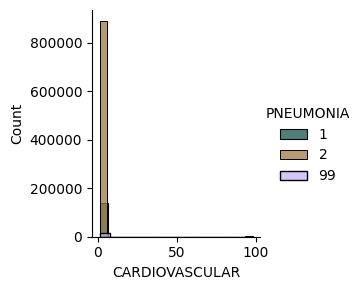

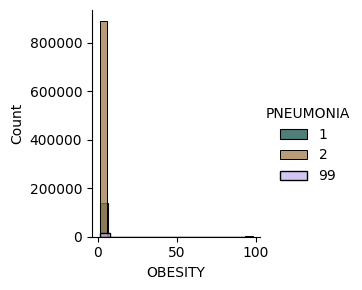

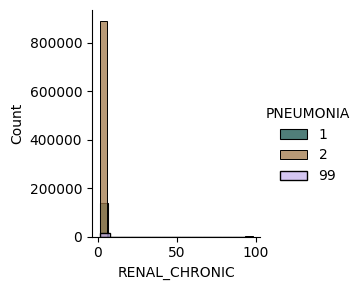

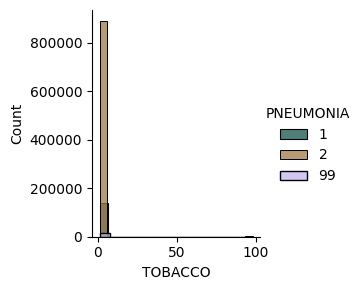

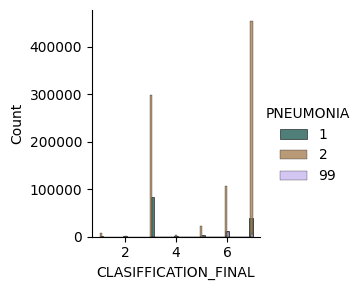

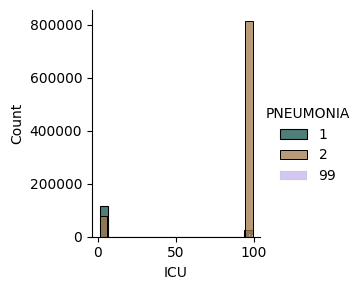

In [19]:
# columns are numerical
cols = ["AGE", "INTUBED", "DIABETES", "HIPERTENSION", "COPD", "ASTHMA", "INMSUPR", "OTHER_DISEASE", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "CLASIFFICATION_FINAL", "ICU"]

dist_bivariate(df_covid, cols)

### Removing redundant variable based on business value

In [20]:
#train
train = train[(train.AGE >= 17) & (train.AGE <= 100)]
train = train[train.USMER > 0]
train = train[train.MEDICAL_UNIT >= 0]
train = train[train.PATIENT_TYPE >= 0]
train = train[train.INTUBED >= 0]
train = train[train.PREGNANT > 0]
train = train[train.DIABETES >= 0]
train = train[train.COPD >= 0]
train = train[train.ASTHMA >= 0]
train = train[train.INMSUPR >= 0]
train = train[train.HIPERTENSION > 0]
train = train[train.OTHER_DISEASE >= 0]
train = train[train.CARDIOVASCULAR >= 0]
train = train[train.OBESITY >= 0]
train = train[train.RENAL_CHRONIC > 0]
train = train[train.TOBACCO >= 0]
train = train[train.CLASIFFICATION_FINAL >= 0]
train = train[train.ICU >= 0]

# #test
test = test[(test.AGE >= 17) & (test.AGE <= 100)]
test = test[test.USMER > 0]
test = test[test.MEDICAL_UNIT >= 0]
test = test[test.PATIENT_TYPE >= 0]
test = test[test.INTUBED >= 0]
test = test[test.PREGNANT > 0]
test = test[test.DIABETES >= 0]
test = test[test.COPD >= 0]
test = test[test.ASTHMA >= 0]
test = test[test.INMSUPR >= 0]
test = test[test.HIPERTENSION > 0]
test = test[test.OTHER_DISEASE >= 0]
test = test[test.CARDIOVASCULAR >= 0]
test = test[test.OBESITY >= 0]
test = test[test.RENAL_CHRONIC > 0]
test = test[test.TOBACCO >= 0]
test = test[test.CLASIFFICATION_FINAL >= 0]
test = test[test.ICU >= 0]

# B. Data Preparation : Data Train (Data Pre-Processing)
1. Drop Duplicated Data
2. Outliers Analysis
3. Missing Value Handling
4. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data. This is done on each data train and data test, so as to avoid data leakage.

1. Drop Duplicated Data

In [21]:
# Detect duplicate data
train[train.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
562391,2,12,1,2,2,1,51,2,2,2,2,2,2,2,2,1,2,2,3,2
292862,2,4,2,1,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97
811936,2,12,2,1,97,2,86,97,2,2,2,2,2,2,2,2,2,2,7,97
407865,2,9,2,1,97,2,53,97,2,2,2,2,2,2,2,2,2,2,3,97
63789,2,4,2,2,2,1,56,97,2,2,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196827,2,4,1,1,97,2,36,2,2,2,2,2,2,2,2,2,2,2,6,97
675275,2,12,1,1,97,2,66,2,2,2,2,2,2,2,2,2,2,2,5,97
540216,2,12,2,1,97,2,23,97,2,2,2,2,2,2,2,2,2,2,3,97
321968,2,4,1,1,97,2,31,2,2,2,2,2,2,2,2,2,2,2,7,97


In [22]:
print("Before drop duplicated data")
train.shape

Before drop duplicated data


(798902, 20)

In [23]:
# drop
train = train.drop_duplicates(keep='first')

In [24]:
print("After drop duplicated data")
train.shape

After drop duplicated data


(161727, 20)


*   Before drop = (798902, 20)
*   After drop = (161727, 20)



In [25]:
# re-check
train[train.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


2. Outliers Analysis

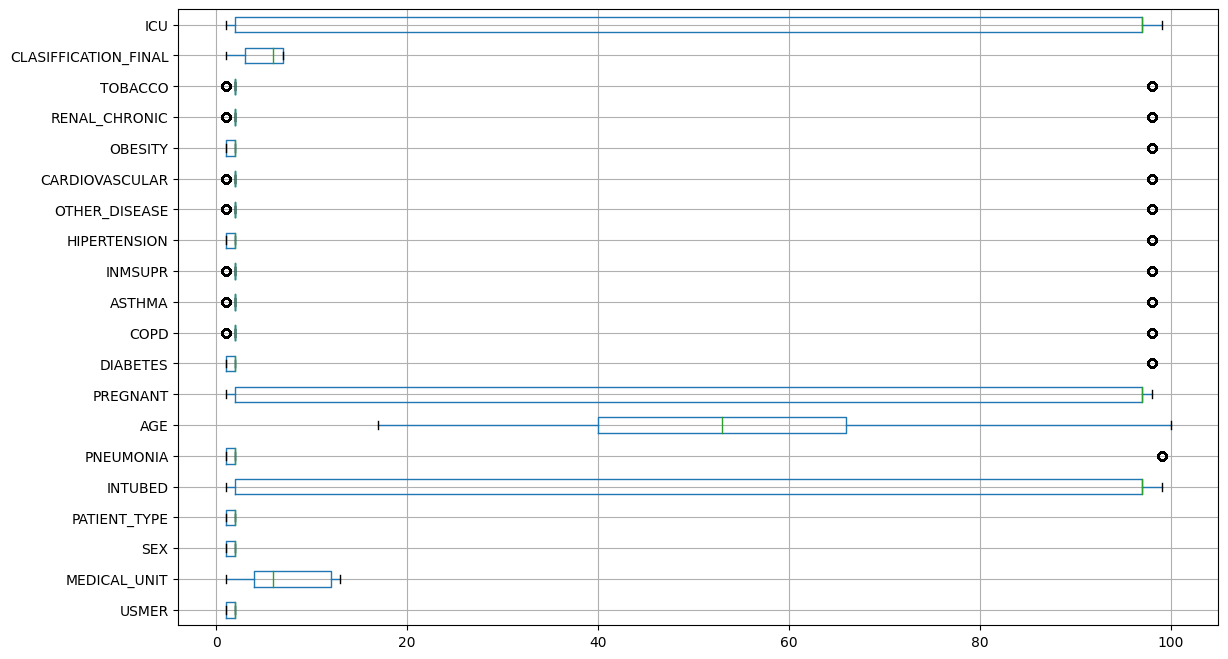

In [26]:
plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [27]:
train.shape

(161727, 20)

Using IQR

In [28]:
# Remove outlier ICU
Q1 = train["ICU"].quantile(0.25)
Q3 = train["ICU"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["ICU"] >= low_limit) & (train["ICU"] <= high_limit)]

In [29]:
# Remove outlier CLASIFFICATION_FINAL
Q1 = train["CLASIFFICATION_FINAL"].quantile(0.25)
Q3 = train["CLASIFFICATION_FINAL"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["CLASIFFICATION_FINAL"] >= low_limit) & (train["CLASIFFICATION_FINAL"] <= high_limit)]

In [30]:
# Remove outlier TOBACCO
Q1 = train["TOBACCO"].quantile(0.25)
Q3 = train["TOBACCO"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["TOBACCO"] >= low_limit) & (train["TOBACCO"] <= high_limit)]

In [31]:
# Remove outlier RENAL_CHRONIC
Q1 = train["RENAL_CHRONIC"].quantile(0.25)
Q3 = train["RENAL_CHRONIC"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["RENAL_CHRONIC"] >= low_limit) & (train["RENAL_CHRONIC"] <= high_limit)]

In [32]:
# Remove outlier OBESITY
Q1 = train["OBESITY"].quantile(0.25)
Q3 = train["OBESITY"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["OBESITY"] >= low_limit) & (train["OBESITY"] <= high_limit)]

In [33]:
# Remove outlier CARDIOVASCULAR
Q1 = train["CARDIOVASCULAR"].quantile(0.25)
Q3 = train["CARDIOVASCULAR"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["CARDIOVASCULAR"] >= low_limit) & (train["CARDIOVASCULAR"] <= high_limit)]

In [34]:
# Remove outlier OTHER_DISEASE
Q1 = train["OTHER_DISEASE"].quantile(0.25)
Q3 = train["OTHER_DISEASE"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["OTHER_DISEASE"] >= low_limit) & (train["OTHER_DISEASE"] <= high_limit)]

In [35]:
# Remove outlier HIPERTENSION
Q1 = train["HIPERTENSION"].quantile(0.25)
Q3 = train["HIPERTENSION"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["HIPERTENSION"] >= low_limit) & (train["HIPERTENSION"] <= high_limit)]

In [36]:
# Remove outlier INMSUPR
Q1 = train["INMSUPR"].quantile(0.25)
Q3 = train["INMSUPR"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["INMSUPR"] >= low_limit) & (train["INMSUPR"] <= high_limit)]

In [37]:
# Remove outlier ASTHMA
Q1 = train["ASTHMA"].quantile(0.25)
Q3 = train["ASTHMA"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["ASTHMA"] >= low_limit) & (train["ASTHMA"] <= high_limit)]

In [38]:
# Remove outlier COPD
Q1 = train["COPD"].quantile(0.25)
Q3 = train["COPD"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["COPD"] >= low_limit) & (train["COPD"] <= high_limit)]

In [39]:
# Remove outlier DIABETES
Q1 = train["DIABETES"].quantile(0.25)
Q3 = train["DIABETES"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["DIABETES"] >= low_limit) & (train["DIABETES"] <= high_limit)]

In [40]:
# Remove outlier PREGNANT
Q1 = train["PREGNANT"].quantile(0.25)
Q3 = train["PREGNANT"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["PREGNANT"] >= low_limit) & (train["PREGNANT"] <= high_limit)]

In [41]:
# Remove outlier AGE
Q1 = train["AGE"].quantile(0.25)
Q3 = train["AGE"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["AGE"] >= low_limit) & (train["AGE"] <= high_limit)]

In [42]:
# Remove outlier INTUBED
Q1 = train["INTUBED"].quantile(0.25)
Q3 = train["INTUBED"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["INTUBED"] >= low_limit) & (train["INTUBED"] <= high_limit)]

In [43]:
# Remove outlier PATIENT_TYPE
Q1 = train["PATIENT_TYPE"].quantile(0.25)
Q3 = train["PATIENT_TYPE"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["PATIENT_TYPE"] >= low_limit) & (train["PATIENT_TYPE"] <= high_limit)]

In [44]:
# Remove outlier SEX
Q1 = train["SEX"].quantile(0.25)
Q3 = train["SEX"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["SEX"] >= low_limit) & (train["SEX"] <= high_limit)]

In [45]:
# Remove outlier MEDICAL_UNIT
Q1 = train["MEDICAL_UNIT"].quantile(0.25)
Q3 = train["MEDICAL_UNIT"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["MEDICAL_UNIT"] >= low_limit) & (train["MEDICAL_UNIT"] <= high_limit)]

In [46]:
# Remove outlier USMER
Q1 = train["USMER"].quantile(0.25)
Q3 = train["USMER"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)

train = train[(train["USMER"] >= low_limit) & (train["USMER"] <= high_limit)]

In [47]:
train.shape

(80023, 20)

Shape after remove outlier: (80023, 20)

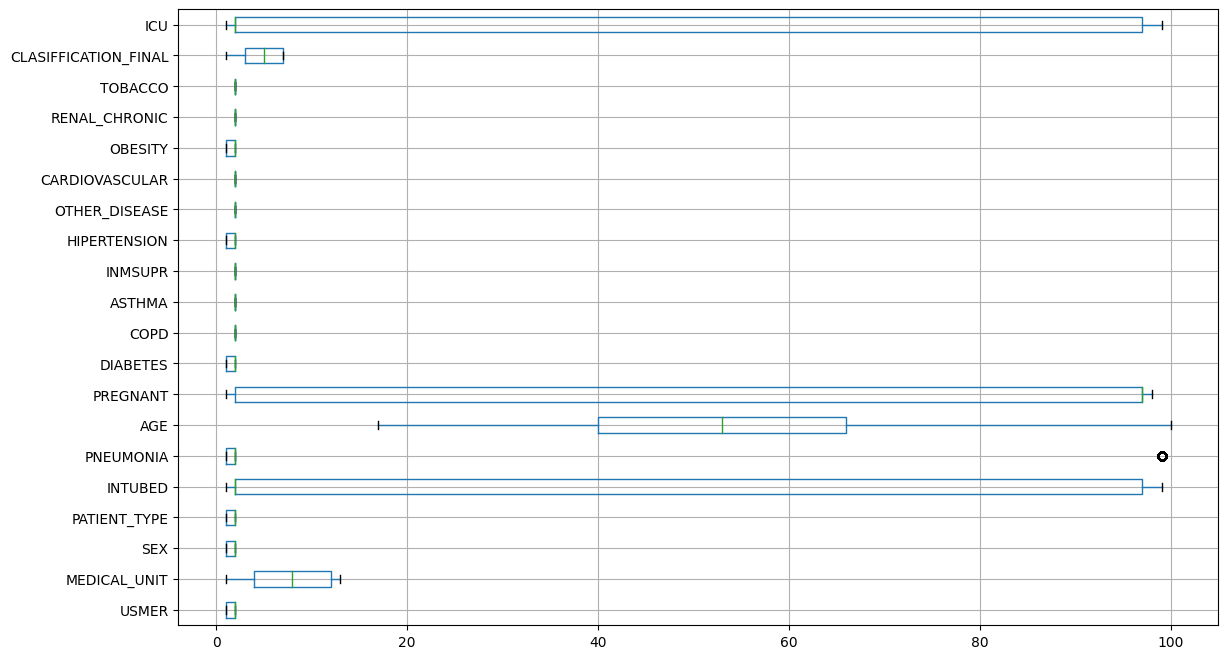

In [48]:
# Outlier Analysis re-checking

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [49]:
train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
562391,2,12,1,2,2,1,51,2,2,2,2,2,2,2,2,1,2,2,3,2
292862,2,4,2,1,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97
811936,2,12,2,1,97,2,86,97,2,2,2,2,2,2,2,2,2,2,7,97
407865,2,9,2,1,97,2,53,97,2,2,2,2,2,2,2,2,2,2,3,97
63789,2,4,2,2,2,1,56,97,2,2,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380594,1,6,1,1,97,2,41,2,1,2,2,2,2,2,2,2,2,2,7,97
334780,2,5,2,2,2,1,50,97,1,2,2,2,2,2,2,2,2,2,3,2
52314,1,4,2,2,1,1,80,97,2,2,2,2,1,2,2,1,2,2,3,2
753263,1,12,1,2,1,1,34,2,2,2,2,2,2,2,2,1,2,2,7,1


In [50]:
train.sample(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
407228,2,9,1,1,97,2,93,2,1,2,2,2,2,2,2,2,2,2,3,97
394176,2,9,1,2,2,1,60,2,2,2,2,2,1,2,2,2,2,2,3,2
137028,2,4,1,1,97,2,20,2,2,2,2,2,1,2,2,1,2,2,3,97
449227,1,12,1,2,2,1,62,2,1,2,2,2,1,2,2,2,2,2,7,2
29952,1,4,2,2,1,2,56,97,2,2,2,2,2,2,2,1,2,2,3,2
1013567,2,12,1,2,2,1,42,2,2,2,2,2,2,2,2,1,2,2,7,1
460164,2,12,2,2,2,1,84,97,2,2,2,2,1,2,2,1,2,2,3,2
387909,1,8,1,1,97,2,44,2,2,2,2,2,2,2,2,1,2,2,5,97
417322,2,9,2,1,97,2,62,97,2,2,2,2,1,2,2,2,2,2,7,97
433746,2,10,1,1,97,2,27,2,1,2,2,2,2,2,2,2,2,2,3,97


3. Missing value check

In [51]:
train['n_missing'] = train.isnull().sum(axis=1)
train.sort_values('n_missing', ascending=False)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,n_missing
562391,2,12,1,2,2,1,51,2,2,2,2,2,2,2,2,1,2,2,3,2,0
385473,2,8,1,1,97,2,32,1,2,2,2,2,1,2,2,1,2,2,3,97,0
185069,1,4,1,1,97,2,66,2,2,2,2,2,2,2,2,1,2,2,6,97,0
348485,1,6,1,2,2,2,59,2,2,2,2,2,2,2,2,2,2,2,3,2,0
13742,2,3,2,2,2,1,41,97,2,2,2,2,2,2,2,2,2,2,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677435,1,12,1,1,97,2,69,2,2,2,2,2,2,2,2,2,2,2,6,97,0
70572,1,4,2,1,97,2,52,97,1,2,2,2,1,2,2,2,2,2,3,97,0
335469,1,5,2,1,97,2,50,97,2,2,2,2,1,2,2,2,2,2,3,97,0
424289,1,9,1,1,97,2,38,1,2,2,2,2,2,2,2,2,2,2,7,97,0


In [52]:
train.drop('n_missing', axis=1, inplace=True)
train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
562391,2,12,1,2,2,1,51,2,2,2,2,2,2,2,2,1,2,2,3,2
292862,2,4,2,1,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97
811936,2,12,2,1,97,2,86,97,2,2,2,2,2,2,2,2,2,2,7,97
407865,2,9,2,1,97,2,53,97,2,2,2,2,2,2,2,2,2,2,3,97
63789,2,4,2,2,2,1,56,97,2,2,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380594,1,6,1,1,97,2,41,2,1,2,2,2,2,2,2,2,2,2,7,97
334780,2,5,2,2,2,1,50,97,1,2,2,2,2,2,2,2,2,2,3,2
52314,1,4,2,2,1,1,80,97,2,2,2,2,1,2,2,1,2,2,3,2
753263,1,12,1,2,1,1,34,2,2,2,2,2,2,2,2,1,2,2,7,1


Missing Value check each columns

In [53]:
train.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [54]:
train.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Missing value check NaN

In [55]:
train.isnull().sum().sum()

0

In [56]:
train.isnull().any().any()

False

In [57]:
count_nan = train.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [58]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= USMER =================


2    43268
1    36755
Name: USMER, dtype: int64


============= MEDICAL_UNIT =================


12    25305
4     23393
6      9112
9      6777
3      4631
8      3639
10     2481
5      2305
11     1406
13      422
7       405
1        79
2        68
Name: MEDICAL_UNIT, dtype: int64


============= SEX =================


2    40645
1    39378
Name: SEX, dtype: int64


============= PATIENT_TYPE =================


2    43316
1    36707
Name: PATIENT_TYPE, dtype: int64


============= INTUBED =================


97    36707
2     30576
1     10509
99     2231
Name: INTUBED, dtype: int64


============= PNEUMONIA =================


2     44345
1     32916
99     2762
Name: PNEUMONIA, dtype: int64


============= AGE =================


55     1677
51     1659
52     1658
53     1650
57     1639
       ... 
96       73
97       52
98       48
99       37
100      34
Name: AGE, Length: 84, dtype: int64


============= PREGNANT =================


97    40645
2     36441
1      1873
98     1064
Name: PREGNANT, dtype: int64


============= DIABETES =================


2    53590
1    26433
Name: DIABETES, dtype: int64


============= COPD =================


2    80023
Name: COPD, dtype: int64


============= ASTHMA =================


2    80023
Name: ASTHMA, dtype: int64


============= INMSUPR =================


2    80023
Name: INMSUPR, dtype: int64


============= HIPERTENSION =================


2    50410
1    29613
Name: HIPERTENSION, dtype: int64


============= OTHER_DISEASE =================


2    80023
Name: OTHER_DISEASE, dtype: int64


============= CARDIOVASCULAR =================


2    80023
Name: CARDIOVASCULAR, dtype: int64


============= OBESITY =================


2    55193
1    24830
Name: OBESITY, dtype: int64


============= RENAL_CHRONIC =================


2    80023
Name: RENAL_CHRONIC, dtype: int64


============= TOBACCO =================


2    80023
Name: TOBACCO, dtype: int64


============= CLASIFFICATION_FINAL =================


3    32573
7    23648
6    13864
5     5364
1     2700
2      965
4      909
Name: CLASIFFICATION_FINAL, dtype: int64


============= ICU =================


97    36707
2     34254
1      6779
99     2283
Name: ICU, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- INTUBED: 99
- PNEUMONIA: 99
- ICU: 99

Note: *The top documentation explains what the value 99 means*

**Check percentage of missing value in each column selection**

In [59]:
100 * len(train[train['INTUBED'].isin([99])]) / len(train)

2.7879484648163655

In [60]:
100 * len(train[train['PNEUMONIA'].isin([99])]) / len(train)

3.4515076915386826

In [61]:
100 * len(train[train['ICU'].isin([99])]) / len(train)

2.8529297826874775

imputation data for : INTUBED, PNEUMONIA, ICU

In [62]:
mode_intubed = train[~train['INTUBED'].isin([99])]['INTUBED'].mode()[0]

train['INTUBED'] = train['INTUBED'].apply(lambda x: mode_intubed if x in [99] else x)

mode_intubed

97

In [63]:
train['INTUBED'].value_counts()

97    38938
2     30576
1     10509
Name: INTUBED, dtype: int64

In [64]:
mode_pneumonia = train[~train['PNEUMONIA'].isin([99])]['PNEUMONIA'].mode()[0]

train['PNEUMONIA'] = train['PNEUMONIA'].apply(lambda x: mode_pneumonia if x in [99] else x)

mode_pneumonia

2

In [65]:
train['PNEUMONIA'].value_counts()

2    47107
1    32916
Name: PNEUMONIA, dtype: int64

In [66]:
mode_icu = train[~train['ICU'].isin([99])]['ICU'].mode()[0]

train['ICU'] = train['ICU'].apply(lambda x: mode_icu if x in [99] else x)

mode_icu

97

In [67]:
train['ICU'].value_counts()

97    38990
2     34254
1      6779
Name: ICU, dtype: int64

Check again if any missing value (99)

In [68]:
for column in train.columns:
    print(f"============= {column} =================")
    display(train[column].value_counts())
    print()

============= USMER =================


2    43268
1    36755
Name: USMER, dtype: int64


============= MEDICAL_UNIT =================


12    25305
4     23393
6      9112
9      6777
3      4631
8      3639
10     2481
5      2305
11     1406
13      422
7       405
1        79
2        68
Name: MEDICAL_UNIT, dtype: int64


============= SEX =================


2    40645
1    39378
Name: SEX, dtype: int64


============= PATIENT_TYPE =================


2    43316
1    36707
Name: PATIENT_TYPE, dtype: int64


============= INTUBED =================


97    38938
2     30576
1     10509
Name: INTUBED, dtype: int64


============= PNEUMONIA =================


2    47107
1    32916
Name: PNEUMONIA, dtype: int64


============= AGE =================


55     1677
51     1659
52     1658
53     1650
57     1639
       ... 
96       73
97       52
98       48
99       37
100      34
Name: AGE, Length: 84, dtype: int64


============= PREGNANT =================


97    40645
2     36441
1      1873
98     1064
Name: PREGNANT, dtype: int64


============= DIABETES =================


2    53590
1    26433
Name: DIABETES, dtype: int64


============= COPD =================


2    80023
Name: COPD, dtype: int64


============= ASTHMA =================


2    80023
Name: ASTHMA, dtype: int64


============= INMSUPR =================


2    80023
Name: INMSUPR, dtype: int64


============= HIPERTENSION =================


2    50410
1    29613
Name: HIPERTENSION, dtype: int64


============= OTHER_DISEASE =================


2    80023
Name: OTHER_DISEASE, dtype: int64


============= CARDIOVASCULAR =================


2    80023
Name: CARDIOVASCULAR, dtype: int64


============= OBESITY =================


2    55193
1    24830
Name: OBESITY, dtype: int64


============= RENAL_CHRONIC =================


2    80023
Name: RENAL_CHRONIC, dtype: int64


============= TOBACCO =================


2    80023
Name: TOBACCO, dtype: int64


============= CLASIFFICATION_FINAL =================


3    32573
7    23648
6    13864
5     5364
1     2700
2      965
4      909
Name: CLASIFFICATION_FINAL, dtype: int64


============= ICU =================


97    38990
2     34254
1      6779
Name: ICU, dtype: int64

In [69]:
train

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
562391,2,12,1,2,2,1,51,2,2,2,2,2,2,2,2,1,2,2,3,2
292862,2,4,2,1,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97
811936,2,12,2,1,97,2,86,97,2,2,2,2,2,2,2,2,2,2,7,97
407865,2,9,2,1,97,2,53,97,2,2,2,2,2,2,2,2,2,2,3,97
63789,2,4,2,2,2,1,56,97,2,2,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380594,1,6,1,1,97,2,41,2,1,2,2,2,2,2,2,2,2,2,7,97
334780,2,5,2,2,2,1,50,97,1,2,2,2,2,2,2,2,2,2,3,2
52314,1,4,2,2,1,1,80,97,2,2,2,2,1,2,2,1,2,2,3,2
753263,1,12,1,2,1,1,34,2,2,2,2,2,2,2,2,1,2,2,7,1


After we handle missing values ​​and imputation, then we inject information from the imputed train data into the test data. `we do it for predictions in test data after modeling.` Do the same for modeling data preparation in test data but when imputing it refers to the treatment in training data.

# C. Data Preparation : Data Test
1. Drop Duplicated Data
2. Missing Value Handling
3. Encoding Preparation

In this part, data preparation do before modelling, so we treatment the train data

1. Drop Duplicated Data

In [70]:
test

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
236355,1,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97
669474,2,12,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,5,97
312496,2,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,1,7,97
728884,1,12,2,1,97,2,42,97,2,2,2,2,1,2,2,1,2,2,7,97
354644,1,6,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787717,2,12,1,1,97,2,29,2,2,2,2,2,2,2,2,2,2,2,7,97
982168,2,12,1,1,97,2,34,2,2,2,2,2,2,2,2,2,2,1,7,97
938415,2,12,2,1,97,2,78,97,2,2,2,2,1,2,2,2,2,2,7,97
355285,2,6,2,1,97,2,47,97,1,2,2,2,1,2,2,1,2,2,3,97


In [71]:
# Detect duplicate data
test[test.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
236355,1,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97
669474,2,12,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,5,97
312496,2,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,1,7,97
728884,1,12,2,1,97,2,42,97,2,2,2,2,1,2,2,1,2,2,7,97
354644,1,6,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784519,2,12,2,1,97,2,59,97,2,2,2,2,1,2,2,1,2,2,7,97
787717,2,12,1,1,97,2,29,2,2,2,2,2,2,2,2,2,2,2,7,97
982168,2,12,1,1,97,2,34,2,2,2,2,2,2,2,2,2,2,1,7,97
938415,2,12,2,1,97,2,78,97,2,2,2,2,1,2,2,2,2,2,7,97


In [72]:
print("Before drop duplicated data test")
test.shape

Before drop duplicated data test


(199623, 20)

In [73]:
# drop
test = test.drop_duplicates(keep='first')

In [74]:
print("After drop duplicated data test")
test.shape

After drop duplicated data test


(61086, 20)

In [75]:
# re-check
test[test.duplicated(keep=False)]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU


2. Missing Value Handling

In [76]:
test['n_missing'] = test.isnull().sum(axis=1)
test.sort_values('n_missing', ascending=False)

<ipython-input-76-11d0296dbec5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['n_missing'] = test.isnull().sum(axis=1)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,n_missing
236355,1,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97,0
9205,2,3,2,1,97,2,20,97,2,2,2,2,2,2,2,2,2,2,3,97,0
280657,1,4,2,1,97,2,70,97,1,2,2,2,1,2,2,2,2,1,7,97,0
94036,2,4,2,2,1,2,39,97,2,2,2,2,1,2,2,2,2,2,3,2,0
373021,2,6,1,1,97,2,55,2,2,2,2,2,2,2,2,2,2,2,7,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203520,1,4,2,2,2,2,55,97,2,2,2,2,2,2,2,2,2,2,6,2,0
747949,2,12,2,1,97,2,19,97,2,2,1,2,2,1,2,2,2,1,7,97,0
245769,2,4,1,1,97,2,89,2,1,1,2,2,1,2,2,1,2,2,7,97,0
315936,1,4,1,1,97,2,27,2,1,2,2,2,2,2,2,1,2,2,7,97,0


In [77]:
test.drop('n_missing', axis=1, inplace=True)
test

<ipython-input-77-e49ab61e151c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('n_missing', axis=1, inplace=True)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
236355,1,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97
669474,2,12,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,5,97
312496,2,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,1,7,97
728884,1,12,2,1,97,2,42,97,2,2,2,2,1,2,2,1,2,2,7,97
354644,1,6,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124389,1,4,2,2,1,1,70,97,2,2,2,2,1,2,2,2,2,1,3,2
164002,1,4,2,1,97,99,34,97,2,2,2,2,2,2,2,1,2,2,6,97
546272,2,12,1,2,2,2,50,2,1,2,2,2,1,2,2,2,1,2,3,2
311830,1,4,2,2,1,2,63,97,1,2,2,2,1,2,2,1,2,2,7,2


In [78]:
test.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [79]:
test.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Missing value check NaN

In [80]:
count_nan_in_test = test.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_test))

Count of NaN: 0


In [81]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= USMER =================


2    33010
1    28076
Name: USMER, dtype: int64


============= MEDICAL_UNIT =================


12    23020
4     21683
6      5183
9      3858
3      2418
8      1627
10     1146
5      1098
11      639
13      191
7       175
1        26
2        22
Name: MEDICAL_UNIT, dtype: int64


============= SEX =================


2    31894
1    29192
Name: SEX, dtype: int64


============= PATIENT_TYPE =================


1    33652
2    27434
Name: PATIENT_TYPE, dtype: int64


============= INTUBED =================


97    33652
2     20837
1      5530
99     1067
Name: INTUBED, dtype: int64


============= PNEUMONIA =================


2     39693
1     19750
99     1643
Name: PNEUMONIA, dtype: int64


============= AGE =================


50     1327
48     1291
56     1289
49     1283
51     1281
       ... 
96       30
97       27
98       23
99       19
100      11
Name: AGE, Length: 84, dtype: int64


============= PREGNANT =================


97    31894
2     27804
1       893
98      495
Name: PREGNANT, dtype: int64


============= DIABETES =================


2     43134
1     17338
98      614
Name: DIABETES, dtype: int64


============= COPD =================


2     57639
1      2888
98      559
Name: COPD, dtype: int64


============= ASTHMA =================


2     56403
1      4129
98      554
Name: ASTHMA, dtype: int64


============= INMSUPR =================


2     58009
1      2434
98      643
Name: INMSUPR, dtype: int64


============= HIPERTENSION =================


2     39282
1     21214
98      590
Name: HIPERTENSION, dtype: int64


============= OTHER_DISEASE =================


2     55851
1      4295
98      940
Name: OTHER_DISEASE, dtype: int64


============= CARDIOVASCULAR =================


2     56678
1      3835
98      573
Name: CARDIOVASCULAR, dtype: int64


============= OBESITY =================


2     43744
1     16783
98      559
Name: OBESITY, dtype: int64


============= RENAL_CHRONIC =================


2     56961
1      3558
98      567
Name: RENAL_CHRONIC, dtype: int64


============= TOBACCO =================


2     51760
1      8722
98      604
Name: TOBACCO, dtype: int64


============= CLASIFFICATION_FINAL =================


3    25295
7    21608
6     9436
5     2684
1     1256
4      439
2      368
Name: CLASIFFICATION_FINAL, dtype: int64


============= ICU =================


97    33652
2     23587
1      2758
99     1089
Name: ICU, dtype: int64

From the result code above, we saw that there are also missing value in several columns. Below is the list of all missing value for each column :
- INTUBED: 99
- PNEUMONIA: 99
- ICU: 99

Note: *The top documentation explains what the value 99 means*

**Check percentage of missing value in each column selection (standard 35%)**

In [82]:
100 * len(test[test['INTUBED'].isin([99])]) / len(test)

1.746717742199522

In [83]:
100 * len(test[test['PNEUMONIA'].isin([99])]) / len(test)

2.68965065645156

In [84]:
100 * len(test[test['ICU'].isin([99])]) / len(test)

1.7827325410077595

imputation data for : INTUBED, PNEUMONIA, ICU

In [85]:
mode_intubed = test[~test['INTUBED'].isin([99])]['INTUBED'].mode()[0]

test['INTUBED'] = test['INTUBED'].apply(lambda x: mode_intubed if x in [99] else x)

mode_intubed

<ipython-input-85-e7724f6be5e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['INTUBED'] = test['INTUBED'].apply(lambda x: mode_intubed if x in [99] else x)


97

In [86]:
test['INTUBED'].value_counts()

97    34719
2     20837
1      5530
Name: INTUBED, dtype: int64

In [87]:
mode_pneumonia = test[~test['PNEUMONIA'].isin([99])]['PNEUMONIA'].mode()[0]

test['PNEUMONIA'] = test['PNEUMONIA'].apply(lambda x: mode_pneumonia if x in [99] else x)

mode_pneumonia

<ipython-input-87-55287815a7b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['PNEUMONIA'] = test['PNEUMONIA'].apply(lambda x: mode_pneumonia if x in [99] else x)


2

In [88]:
test['PNEUMONIA'].value_counts()

2    41336
1    19750
Name: PNEUMONIA, dtype: int64

In [89]:
mode_icu = test[~test['ICU'].isin([99])]['ICU'].mode()[0]

test['ICU'] = test['ICU'].apply(lambda x: mode_icu if x in [99] else x)

mode_icu

<ipython-input-89-d2244379f4ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['ICU'] = test['ICU'].apply(lambda x: mode_icu if x in [99] else x)


97

In [90]:
test['ICU'].value_counts()

97    34741
2     23587
1      2758
Name: ICU, dtype: int64

Check again for each columns

In [91]:
for column in test.columns:
    print(f"============= {column} =================")
    display(test[column].value_counts())
    print()

============= USMER =================


2    33010
1    28076
Name: USMER, dtype: int64


============= MEDICAL_UNIT =================


12    23020
4     21683
6      5183
9      3858
3      2418
8      1627
10     1146
5      1098
11      639
13      191
7       175
1        26
2        22
Name: MEDICAL_UNIT, dtype: int64


============= SEX =================


2    31894
1    29192
Name: SEX, dtype: int64


============= PATIENT_TYPE =================


1    33652
2    27434
Name: PATIENT_TYPE, dtype: int64


============= INTUBED =================


97    34719
2     20837
1      5530
Name: INTUBED, dtype: int64


============= PNEUMONIA =================


2    41336
1    19750
Name: PNEUMONIA, dtype: int64


============= AGE =================


50     1327
48     1291
56     1289
49     1283
51     1281
       ... 
96       30
97       27
98       23
99       19
100      11
Name: AGE, Length: 84, dtype: int64


============= PREGNANT =================


97    31894
2     27804
1       893
98      495
Name: PREGNANT, dtype: int64


============= DIABETES =================


2     43134
1     17338
98      614
Name: DIABETES, dtype: int64


============= COPD =================


2     57639
1      2888
98      559
Name: COPD, dtype: int64


============= ASTHMA =================


2     56403
1      4129
98      554
Name: ASTHMA, dtype: int64


============= INMSUPR =================


2     58009
1      2434
98      643
Name: INMSUPR, dtype: int64


============= HIPERTENSION =================


2     39282
1     21214
98      590
Name: HIPERTENSION, dtype: int64


============= OTHER_DISEASE =================


2     55851
1      4295
98      940
Name: OTHER_DISEASE, dtype: int64


============= CARDIOVASCULAR =================


2     56678
1      3835
98      573
Name: CARDIOVASCULAR, dtype: int64


============= OBESITY =================


2     43744
1     16783
98      559
Name: OBESITY, dtype: int64


============= RENAL_CHRONIC =================


2     56961
1      3558
98      567
Name: RENAL_CHRONIC, dtype: int64


============= TOBACCO =================


2     51760
1      8722
98      604
Name: TOBACCO, dtype: int64


============= CLASIFFICATION_FINAL =================


3    25295
7    21608
6     9436
5     2684
1     1256
4      439
2      368
Name: CLASIFFICATION_FINAL, dtype: int64


============= ICU =================


97    34741
2     23587
1      2758
Name: ICU, dtype: int64

In [92]:
test

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
236355,1,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97
669474,2,12,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,5,97
312496,2,4,1,1,97,2,28,2,2,2,2,2,2,2,2,2,2,1,7,97
728884,1,12,2,1,97,2,42,97,2,2,2,2,1,2,2,1,2,2,7,97
354644,1,6,1,1,97,2,41,2,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124389,1,4,2,2,1,1,70,97,2,2,2,2,1,2,2,2,2,1,3,2
164002,1,4,2,1,97,2,34,97,2,2,2,2,2,2,2,1,2,2,6,97
546272,2,12,1,2,2,2,50,2,1,2,2,2,1,2,2,2,1,2,3,2
311830,1,4,2,2,1,2,63,97,1,2,2,2,1,2,2,1,2,2,7,2


Split into Xtrain, ytrain, Xtest, ytest

In [93]:
#train dataset
Xtrain = train.drop(columns=['PNEUMONIA']) #drop column target
ytrain = train['PNEUMONIA'] #choose column target

#test dataset
Xtest = test.drop(columns=['PNEUMONIA']) #drop column target
ytest = test['PNEUMONIA'] #choose column target

print('There are {} samples in the training set and {} samples in the test set.'.format(
Xtrain.shape[0] , Xtest.shape[0]))

There are 80023 samples in the training set and 61086 samples in the test set.


In [94]:
Xtrain

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
562391,2,12,1,2,2,51,2,2,2,2,2,2,2,2,1,2,2,3,2
292862,2,4,2,1,97,52,97,2,2,2,2,2,2,2,2,2,2,7,97
811936,2,12,2,1,97,86,97,2,2,2,2,2,2,2,2,2,2,7,97
407865,2,9,2,1,97,53,97,2,2,2,2,2,2,2,2,2,2,3,97
63789,2,4,2,2,2,56,97,2,2,2,2,2,2,2,2,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380594,1,6,1,1,97,41,2,1,2,2,2,2,2,2,2,2,2,7,97
334780,2,5,2,2,2,50,97,1,2,2,2,2,2,2,2,2,2,3,2
52314,1,4,2,2,1,80,97,2,2,2,2,1,2,2,1,2,2,3,2
753263,1,12,1,2,1,34,2,2,2,2,2,2,2,2,1,2,2,7,1


In [95]:
ytrain

562391    1
292862    2
811936    2
407865    2
63789     1
         ..
380594    2
334780    1
52314     1
753263    1
336287    2
Name: PNEUMONIA, Length: 80023, dtype: int64

In [96]:
Xtest

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
236355,1,4,1,1,97,28,2,2,2,2,2,2,2,2,2,2,2,7,97
669474,2,12,1,1,97,51,2,2,2,2,2,2,2,2,2,2,2,5,97
312496,2,4,1,1,97,28,2,2,2,2,2,2,2,2,2,2,1,7,97
728884,1,12,2,1,97,42,97,2,2,2,2,1,2,2,1,2,2,7,97
354644,1,6,1,1,97,41,2,2,2,2,2,2,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124389,1,4,2,2,1,70,97,2,2,2,2,1,2,2,2,2,1,3,2
164002,1,4,2,1,97,34,97,2,2,2,2,2,2,2,1,2,2,6,97
546272,2,12,1,2,2,50,2,1,2,2,2,1,2,2,2,1,2,3,2
311830,1,4,2,2,1,63,97,1,2,2,2,1,2,2,1,2,2,7,2


In [97]:
ytest

236355    2
669474    2
312496    2
728884    2
354644    2
         ..
124389    1
164002    2
546272    2
311830    2
355285    2
Name: PNEUMONIA, Length: 61086, dtype: int64

In [98]:
Xtrain.shape

(80023, 19)

In [99]:
Xtest.shape

(61086, 19)

### Split Xtrain and Xtest into different categories : numerical and categorical
The code below is is used to split the Xtrain into 2 different categories which one consists of categorical data while the other consists of numerical data.

In [100]:
non_std_var_train = Xtrain[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']]

std_var_train = Xtrain.drop(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL'], axis=1)

# Intubed, Icu has a large tens value so there is no need to enter it

In [101]:
non_std_var_test = Xtest[['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL']]

std_var_test = Xtest.drop(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'AGE',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'CLASIFFICATION_FINAL'], axis=1)

# Intubed, Icu has a large tens value so there is no need to enter it

### Standar Scaller / Feature Scalling
Since there are numerical data (continuous) in the table, StandardScaler was used to scales each input variable separately by subtracting the mean and dividing by the standard deviation in order to have a distribution of mean of zero and a standard deviation of one.

In [102]:
scaler = StandardScaler()
scaled_Xtrain = scaler.fit_transform(std_var_train)
scaled_Xtest = scaler.transform(std_var_test)

In [103]:
#Scalling Xtrain
scaled_Xtrain = pd.DataFrame(scaled_Xtrain)
scaled_Xtrain = scaled_Xtrain.reset_index()
non_std_var_train =  non_std_var_train.reset_index()
scaled_Xtrain

,index,0,1
0,0,-0.968127,-0.971299
1,1,1.027177,1.025849
2,2,1.027177,1.025849
3,3,1.027177,1.025849
4,4,-0.968127,-0.971299
...,...,...,...
80018,80018,1.027177,1.025849
80019,80019,-0.968127,-0.971299
80020,80020,-0.989131,-0.971299
80021,80021,-0.989131,-0.992322


In [104]:
#Scalling Xtest
scaled_Xtest = pd.DataFrame(scaled_Xtest)
scaled_Xtest = scaled_Xtest.reset_index()
non_std_var_test =  non_std_var_test.reset_index()
scaled_Xtest

,index,0,1
0,0,1.027177,1.025849
1,1,1.027177,1.025849
2,2,1.027177,1.025849
3,3,1.027177,1.025849
4,4,1.027177,1.025849
...,...,...,...
61081,61081,-0.989131,-0.971299
61082,61082,1.027177,1.025849
61083,61083,-0.968127,-0.971299
61084,61084,-0.989131,-0.971299


In [105]:
#Merging Xtrain
Xtrain = pd.concat([scaled_Xtrain,non_std_var_train],axis=1)
Xtrain = Xtrain.drop(['index','index'],axis=1)

#Merging Xtest
Xtest = pd.concat([scaled_Xtest,non_std_var_test],axis=1)
Xtest = Xtest.drop(['index','index'],axis=1)

return columns that are not standard in the scaller (INTUBED, ICU)

In [106]:
Xtrain = Xtrain.rename(columns={0: 'INTUBED', 1: 'ICU'})
Xtest = Xtest.rename(columns={0: 'INTUBED', 1: 'ICU'})

In [107]:
Xtrain.head()

,INTUBED,ICU,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,-0.968127,-0.971299,2,12,1,2,51,2,2,2,2,2,2,2,2,1,2,2,3
1,1.027177,1.025849,2,4,2,1,52,97,2,2,2,2,2,2,2,2,2,2,7
2,1.027177,1.025849,2,12,2,1,86,97,2,2,2,2,2,2,2,2,2,2,7
3,1.027177,1.025849,2,9,2,1,53,97,2,2,2,2,2,2,2,2,2,2,3
4,-0.968127,-0.971299,2,4,2,2,56,97,2,2,2,2,2,2,2,2,2,2,3


In [108]:
Xtest.head()

,INTUBED,ICU,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,1.027177,1.025849,1,4,1,1,28,2,2,2,2,2,2,2,2,2,2,2,7
1,1.027177,1.025849,2,12,1,1,51,2,2,2,2,2,2,2,2,2,2,2,5
2,1.027177,1.025849,2,4,1,1,28,2,2,2,2,2,2,2,2,2,2,1,7
3,1.027177,1.025849,1,12,2,1,42,97,2,2,2,2,1,2,2,1,2,2,7
4,1.027177,1.025849,1,6,1,1,41,2,2,2,2,2,2,2,2,2,2,2,3


In [109]:
# check any NaN
count_nan_in_xtest = Xtest.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_xtest))

Count of NaN: 0


In [110]:
ytrain.value_counts()

2    47107
1    32916
Name: PNEUMONIA, dtype: int64

In [111]:
47107/(47107+32916)

0.5886682578758607

In [112]:
ytest.value_counts()

2    41336
1    19750
Name: PNEUMONIA, dtype: int64

In [113]:
41336/(41336+19750)

0.6766853288805945

# D. Baseline Model

Using Classification for modelling
1. Logistic Regression
2. K-Nearest Neighbours (KNN)
3. Naive Bayes
4. Support Vector Machine (SVM)

---

*   TP : Prediction Possitive and data ytest true
*   TN : Prediction Negative and data ytest (actual) true
*   FP : Prediction Possitive but data ytest false (Negative)
*   FN : Prediction Negative but data ytest false (Possitive)

y_test, y_prediction

### 1. Logistic Regression

In [114]:
# Instantiate classifier
logistic_regression = LogisticRegression()

# Fit model to training data
logistic_regression.fit(Xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [115]:
print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (80023, 19)
Xtest shape: (61086, 19)


In [116]:
# Predict test data on logistic regression
print(f"Train Accuracy : {logistic_regression.score(Xtrain, ytrain)*100} %" )
print(f"Test Accuracy : {logistic_regression.score(Xtest, ytest)*100} %" )

Train Accuracy : 72.2454794246654 %
Test Accuracy : 77.39907671152146 %


### 2. K-Nearest Neighbours (KNN)
KNN is an algorithm which it is non-parametric and lazy (instance based) because it doesn't have a specialized training phase. In this section, the grid search algorithm was used to find the best parameters for the k values in order to have the best accuracy. In this case, k value of 14 provides the highest accuracy score.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not 

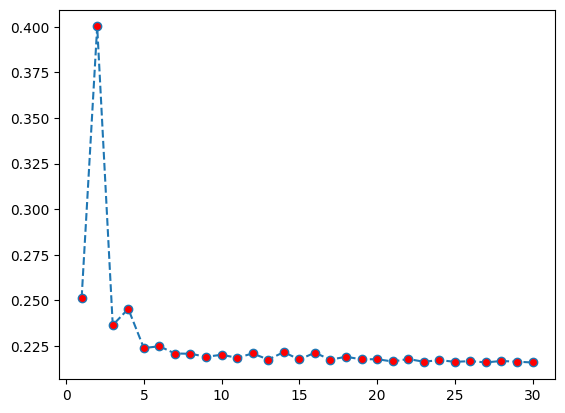

In [117]:
# finding the K value
error = []

for i in range(1,31,1):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xtrain,ytrain)
    preds = knn.predict(Xtest.values)
    error.append(np.mean(preds!=ytest))

plt.plot(range(1, 31, 1), error, linestyle = 'dashed', marker ='o', mfc= 'red')
plt.show()

In [118]:
# fit model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [119]:
knn_model = knn.predict(Xtest.values)
knn_modeltrain = knn.predict(Xtrain.values)

print(f"Train Accuracy : {accuracy_score(ytrain, knn_modeltrain)*100} %" )
print(f"Test Accuracy : {accuracy_score(ytest, knn_model)*100} %" )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Accuracy : 75.97940592079777 %
Test Accuracy : 59.9859214877386 %


### 3. Naive Bayes
Naive Bayes is a simple "probabilistic classifiers" which based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (X) and it is useful for very large dataset. In this section, GaussionNB was imported from sklearn and Xtrain, ytrain were bring fitted into the model in order to do prediction.

In [120]:
# initialize model
naive_model = GaussianNB()

# fit model
naive_model.fit(Xtrain, ytrain)

GaussianNB()

Predict testing test and testing train

In [121]:
y_naive_model_model = naive_model.predict(Xtest)
y_naive_model_model_train = naive_model.predict(Xtrain)

In [122]:
print(f"Train Accuracy : {accuracy_score(ytrain, y_naive_model_model_train)*100} %" )
print(f"Test Accuracy : {accuracy_score(ytest, y_naive_model_model)*100} %" )

Train Accuracy : 72.00054984192045 %
Test Accuracy : 76.81465474904233 %


### 4. Support Vector Machine (SVM)
A linear SVM was chosen by using the SVC classifier to make prediction on Xtest dataset by fitting the Xtrain and ytrain datasets into the SVM model. Accuracy was calculated and displyed by using score syntax.

In [123]:
# Create a linear SVM classifier
svm_model = SVC()

# Train classifier
svm_model.fit(Xtrain, ytrain)

# Take the model that was trained on the Xtrain data and apply it to the Xtest
y_pred_svm = svm_model.predict(Xtest)

# Calculation of accuracy Data Test
svmScore = svm_model.score(Xtest, ytest)
svmScoreTrain = svm_model.score(Xtrain,ytrain)

# Calculation of confusion matrix
svmMatrix = confusion_matrix(ytest, y_pred_svm)

# Print output
print(f"Train Accuracy : {svmScoreTrain*100} %")
print(f"Test Accuracy : {svmScore*100} %")

Train Accuracy : 72.00304912337702 %
Test Accuracy : 77.05366205022428 %


# E. Evaluation Model
The evaluation mathod used involving confusion metrix, precision-recall curve and also learning curve.

1. Learning Curve
2. Model Evaluation
3. Precision Recall Curve

In [124]:
# Join data Xtrain and Xtest before doing learning curve
X = pd.concat([Xtrain, Xtest], axis=0)

# Join data ytrain and ytest before doing learning curve
y = pd.concat([ytrain, ytest], axis=0)

In [125]:
X.head()

,INTUBED,ICU,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,-0.968127,-0.971299,2,12,1,2,51,2,2,2,2,2,2,2,2,1,2,2,3
1,1.027177,1.025849,2,4,2,1,52,97,2,2,2,2,2,2,2,2,2,2,7
2,1.027177,1.025849,2,12,2,1,86,97,2,2,2,2,2,2,2,2,2,2,7
3,1.027177,1.025849,2,9,2,1,53,97,2,2,2,2,2,2,2,2,2,2,3
4,-0.968127,-0.971299,2,4,2,2,56,97,2,2,2,2,2,2,2,2,2,2,3


In [126]:
y.head()

562391    1
292862    2
811936    2
407865    2
63789     1
Name: PNEUMONIA, dtype: int64

### 1. Learning curve

In [127]:
# reusable function
def plot_learning_curve_classification(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel(scoring)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training " + scoring)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing " + scoring)

    plt.legend(loc="best")
    plt.show()

Learning Curves : Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

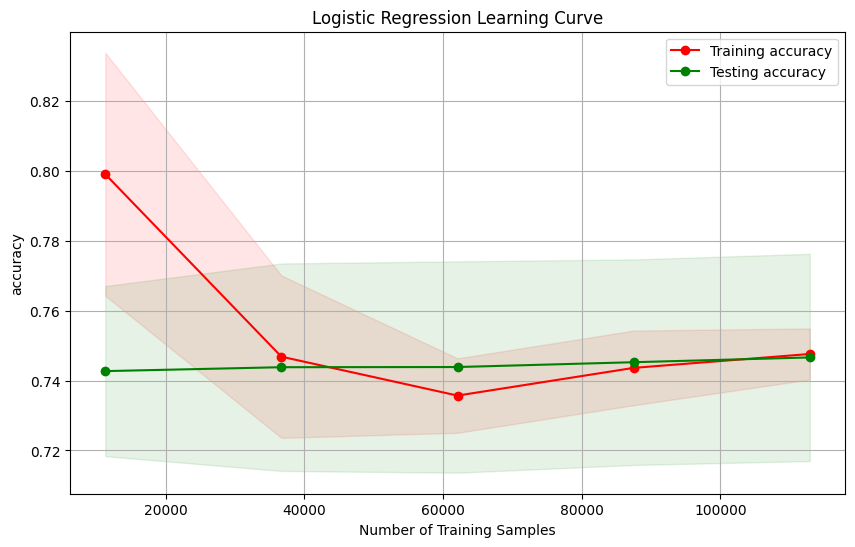

In [128]:
plot_learning_curve_classification(logistic_regression, X, y, cv=5, scoring='accuracy', title="Logistic Regression Learning Curve")

Learning Curves : KNN

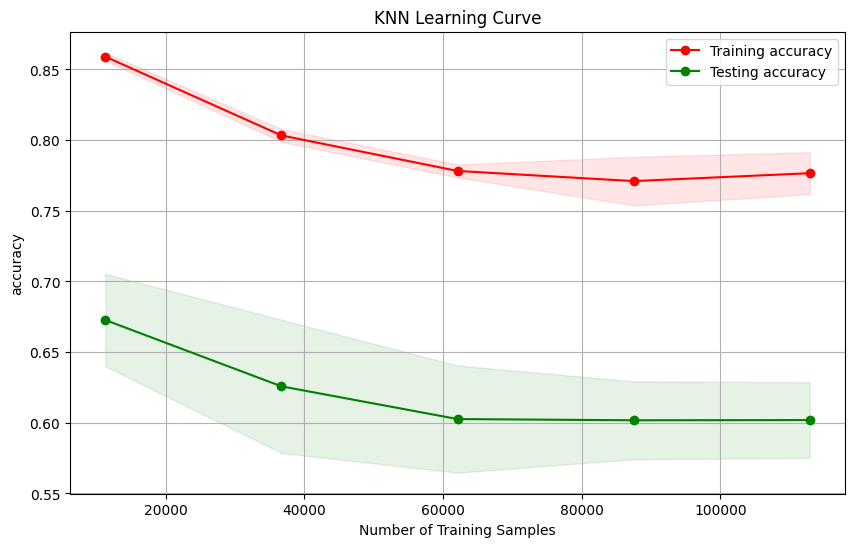

In [129]:
plot_learning_curve_classification(knn, X.values, y.values, cv=5, scoring='accuracy', title="KNN Learning Curve")

Learning Curves : Naive Bayes

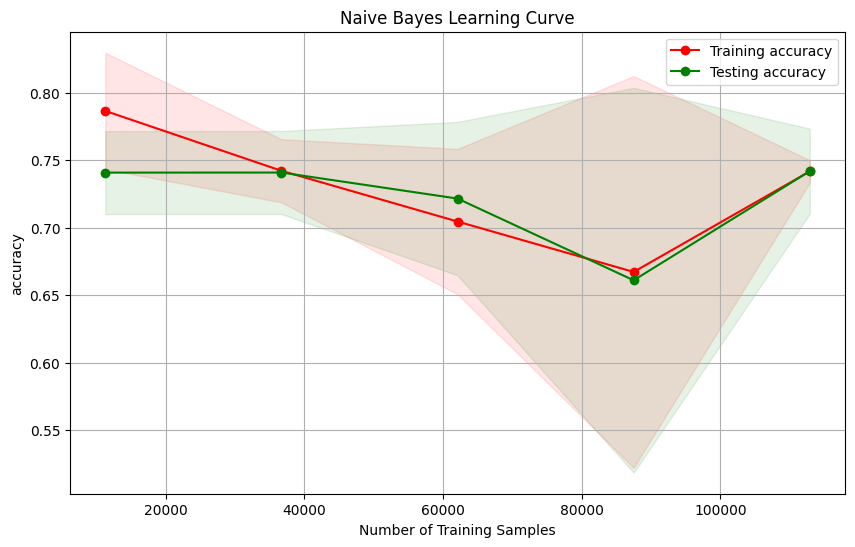

In [130]:
plot_learning_curve_classification(naive_model, X, y, cv=5, scoring='accuracy', title="Naive Bayes Learning Curve")

Learning Curves : SVM

In [ ]:
plot_learning_curve_classification(svm_model, X, y, cv=5, scoring='accuracy', title="SVM Learning Curve")

### 2. Model Evaluation

In [131]:
# reusable function
def model_evaluation(model, name):
    confusion_matrix = pd.crosstab(ytest, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

    target_names = ['No' , 'Yes']
    print ('Accuracy:', accuracy_score(ytest, model))
    print ('Precision:', precision_score(ytest, model,pos_label=1))
    print ('F1 score:', f1_score(ytest, model,pos_label=1))
    print ('Recall:', recall_score(ytest, model,pos_label=1))
    print ('\n clasification report:\n', classification_report(ytest,model,target_names=target_names))

In [132]:
def evaluate(model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('')

    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Test:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

Logistic Regression

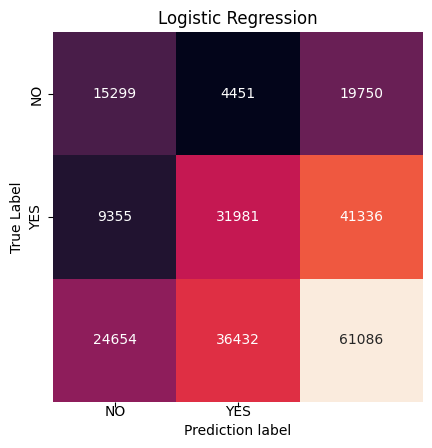

Accuracy: 0.7739907671152146
Precision: 0.6205483897136367
F1 score: 0.6890820646788577
Recall: 0.7746329113924051

 clasification report:
               precision    recall  f1-score   support

          No       0.62      0.77      0.69     19750
         Yes       0.88      0.77      0.82     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.77      0.76     61086
weighted avg       0.79      0.77      0.78     61086



In [133]:
logreg_y_pred = logistic_regression.predict(Xtest)
model_evaluation(logreg_y_pred,"Logistic Regression")

In [134]:
evaluate(logistic_regression, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           1       0.64      0.75      0.69     32916
           2       0.80      0.70      0.75     47107

    accuracy                           0.72     80023
   macro avg       0.72      0.73      0.72     80023
weighted avg       0.73      0.72      0.72     80023

------
Assuming 1 as positive, we get for Data Train:

True Positive: 33203
True Negative: 24610
False Positive: 8306
False Negative: 13904

Accuracy Data Train: 0.722454794246654
Precision Data Train: 0.7998988171239972
Recall Data Train: 0.7048421678306833
F1-Score Data Train: 0.7493680599440282

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           1       0.62      0.77      0.69     19750
           2       0.88      0.77      0.82     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.77      

KNN

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


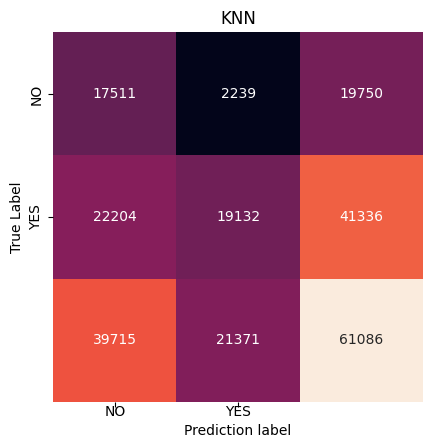

Accuracy: 0.599859214877386
Precision: 0.4409165302782324
F1 score: 0.5889514840662575
Recall: 0.8866329113924051

 clasification report:
               precision    recall  f1-score   support

          No       0.44      0.89      0.59     19750
         Yes       0.90      0.46      0.61     41336

    accuracy                           0.60     61086
   macro avg       0.67      0.67      0.60     61086
weighted avg       0.75      0.60      0.60     61086



In [135]:
knn_y_pred = knn.predict(Xtest.values)
model_evaluation(knn_y_pred,"KNN")

In [136]:
evaluate(knn, x_test = Xtest.values, y_test = ytest.values, x_train=Xtrain.values, y_train=ytrain.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           1       0.63      0.99      0.77     32916
           2       0.99      0.60      0.75     47107

    accuracy                           0.76     80023
   macro avg       0.81      0.79      0.76     80023
weighted avg       0.84      0.76      0.76     80023

------
Assuming 1 as positive, we get for Data Train:

True Positive: 28114
True Negative: 32687
False Positive: 229
False Negative: 18993

Accuracy Data Train: 0.7597940592079777
Precision Data Train: 0.9919204036269978
Recall Data Train: 0.5968115142123251
F1-Score Data Train: 0.7452352551358515


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(



======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           1       0.44      0.89      0.59     19750
           2       0.90      0.46      0.61     41336

    accuracy                           0.60     61086
   macro avg       0.67      0.67      0.60     61086
weighted avg       0.75      0.60      0.60     61086

------
Assuming 1 as positive, we get:

True Positive: 19132
True Negative: 17511
False Positive: 2239
False Negative: 22204

Accuracy Data Test: 0.599859214877386
Precision Data Test: 0.8952318562538019
Recall Data Test: 0.4628411070253532
F1-Score Data Test: 0.6102030076387006


Naive Bayes

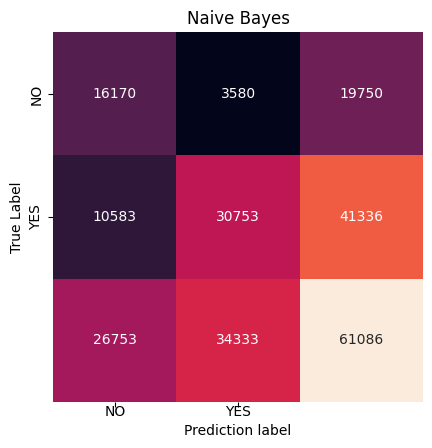

Accuracy: 0.7681465474904233
Precision: 0.6044181960901581
F1 score: 0.6954390039352301
Recall: 0.8187341772151899

 clasification report:
               precision    recall  f1-score   support

          No       0.60      0.82      0.70     19750
         Yes       0.90      0.74      0.81     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.78      0.75     61086
weighted avg       0.80      0.77      0.77     61086



In [137]:
nb_y_pred = naive_model.predict(Xtest)
model_evaluation(nb_y_pred,"Naive Bayes")

In [138]:
evaluate(naive_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           1       0.63      0.78      0.70     32916
           2       0.82      0.68      0.74     47107

    accuracy                           0.72     80023
   macro avg       0.72      0.73      0.72     80023
weighted avg       0.74      0.72      0.72     80023

------
Assuming 1 as positive, we get for Data Train:

True Positive: 31828
True Negative: 25789
False Positive: 7127
False Negative: 15279

Accuracy Data Train: 0.7200054984192045
Precision Data Train: 0.8170453086895135
Recall Data Train: 0.6756532999341923
F1-Score Data Train: 0.7396528084404266

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           1       0.60      0.82      0.70     19750
           2       0.90      0.74      0.81     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.78     

SVM

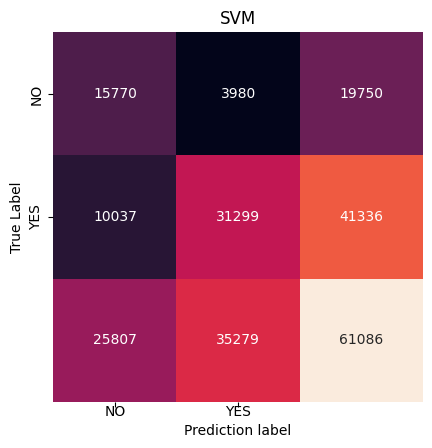

Accuracy: 0.7705366205022427
Precision: 0.6110745146665634
F1 score: 0.692319511820357
Recall: 0.7984810126582278

 clasification report:
               precision    recall  f1-score   support

          No       0.61      0.80      0.69     19750
         Yes       0.89      0.76      0.82     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.78      0.75     61086
weighted avg       0.80      0.77      0.78     61086



In [139]:
svm_y_pred = svm_model.predict(Xtest)
model_evaluation(svm_y_pred,"SVM")

In [142]:
evaluate(svm_model, x_test = Xtest, y_test = ytest, x_train=Xtrain, y_train=ytrain)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           1       0.63      0.78      0.70     32916
           2       0.82      0.68      0.74     47107

    accuracy                           0.72     80023
   macro avg       0.72      0.73      0.72     80023
weighted avg       0.74      0.72      0.72     80023

------
Assuming 1 as positive, we get for Data Train:

True Positive: 31827
True Negative: 25792
False Positive: 7124
False Negative: 15280

Accuracy Data Train: 0.7200304912337703
Precision Data Train: 0.8171035403455623
Recall Data Train: 0.6756320716666313
F1-Score Data Train: 0.7396639475702433

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           1       0.61      0.80      0.69     19750
           2       0.89      0.76      0.82     41336

    accuracy                           0.77     61086
   macro avg       0.75      0.78     

# CONCLUSION

*   Logistic regression
    1. Accuracy data train : 72%
    2. Accuracy data test : 77%

*   KNN
    1. Accuracy data train : 75%
    2. Accuracy data test : 59%

*   Naive Bayes
    1. Accuracy data train : 72%
    2. Accuracy data test : 76%

*   SVM
    1. Accuracy data train : 72%
    2. Accuracy data test : 77%



### The best model we can use is
  1. Logistic regression
  2. Naive Bayes
  3. SVM

KNN model is not recommended because indicated overfit (standard difference ratio is <= 5),
75-59 = 16

Suggestion: *we can improve with several feature engineering techniques, and use hyperparameter tuning to improve the performance and accuracy of machine learning models*

### Version of library

In [164]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b